# Intuit data challenge
## Observe the data

The column num_paid_preparer_returns in irs data interested me most. 
I want to know, what's the feature of people who are willing to pay for tax return.
This is based on the assumption that people whether are willing to pay for tax return or not can make a difference on their expectation to out product.

### Let's get started!
First, read the origin irs data, and connected with zipcode and state dataset.

In [182]:
import pandas as pd

digit=pd.read_csv("digit_abbr.csv")
irs=pd.read_csv("irs_public_data.csv")
zipcode=pd.read_csv("free-zipcode-database-Primary.csv")
irs_zc=pd.merge(irs,zipcode,how = 'left',left_on="zipcode",right_on="Zipcode")
state_data_irs=pd.merge(digit,irs_zc,how = 'right',left_on="State Abbreviation", right_on="State")

In [183]:
state_data_irs_clean = state_data_irs[['State Number','State Abbreviation' ,'State_x' ,'zipcode', 'agi_stub',
 'num_returns' ,'num_single_returns', 'num_joint_returns',
 'num_head_of_household_returns' ,'num_paid_preparer_returns',
 'num_exemptions', 'num_dependents' ,'amount_agi' ,'num_returns_with_refunds',
 'amount_refunds' ]]


## Prepare data
### irs: delete row with 0

In [184]:
print(len(state_data_irs_clean))
# print(state_data_irs.head(10))
state_data_irs_drop0 = state_data_irs_clean[(state_data_irs_clean.T!= 0).all()] 
print(len(state_data_irs_drop0))
print(state_data_irs_drop0.columns.values)

171684
84210
['State Number' 'State Abbreviation' 'State_x' 'zipcode' 'agi_stub'
 'num_returns' 'num_single_returns' 'num_joint_returns'
 'num_head_of_household_returns' 'num_paid_preparer_returns'
 'num_exemptions' 'num_dependents' 'amount_agi' 'num_returns_with_refunds'
 'amount_refunds']


## Add column paid_datio:
paid ratio equals to number of paid prepared returns devided by total number of returns.

In [199]:
#state_data_irs_drop0[:,('paid_ratio')]=pd.Series(state_data_irs_drop0.loc[:,('num_paid_preparer_returns')]/state_data_irs_drop0.loc[:,('num_returns')])
state_data_irs_drop0['paid_ratio']=pd.Series(state_data_irs_drop0.loc[:,('num_paid_preparer_returns')]/state_data_irs_drop0.loc[:,('num_returns')])

state_data_irs_drop0.to_csv('clean_irs.csv')
clean_irs=pd.read_csv("clean_irs.csv")
print(clean_irs.columns.values)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['Unnamed: 0' 'State Number' 'State Abbreviation' 'State_x' 'zipcode'
 'agi_stub' 'num_returns' 'num_single_returns' 'num_joint_returns'
 'num_head_of_household_returns' 'num_paid_preparer_returns'
 'num_exemptions' 'num_dependents' 'amount_agi' 'num_returns_with_refunds'
 'amount_refunds' 'paid_ratio']


### Plot different type  of income of top 10 states.

Text(0,0.5,'Count of returns')

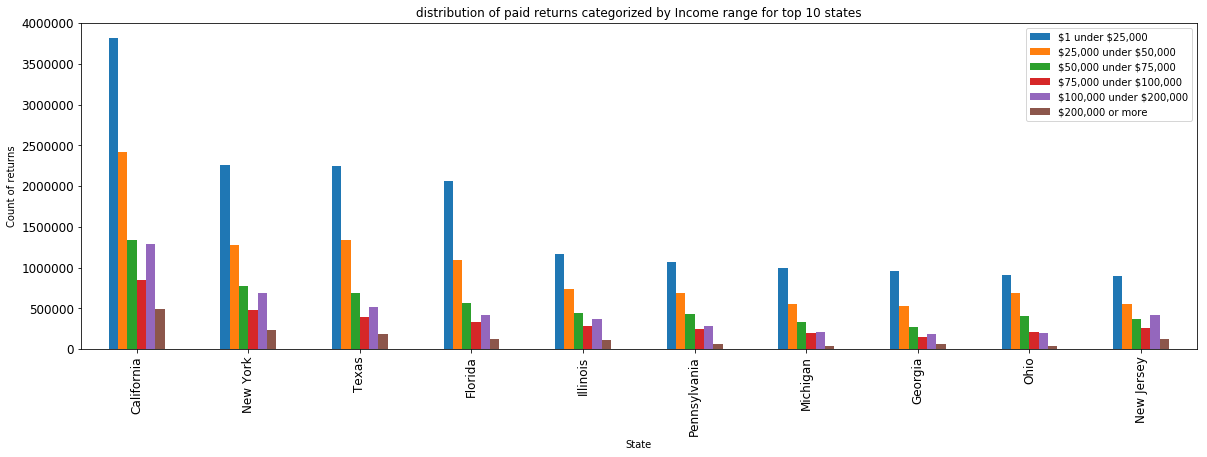

In [187]:
%matplotlib inline

state_stub = state_data_irs_drop0.pivot_table(index=['State_x'], 
                                    columns=['agi_stub'], 
                                    values='num_paid_preparer_returns',
                                    aggfunc='sum')
# rename the column
new_columns = state_stub.columns.values
new_columns = ['\$1 under $25,000','\$25,000 under $50,000','\$50,000 under $75,000','\$75,000 under $100,000','\$100,000 under $200,000','\$200,000 or more']
state_stub.columns = new_columns

sub_state_stub=state_stub.sort_values(by=['\$1 under $25,000','\$25,000 under $50,000','\$50,000 under $75,000','\$75,000 under $100,000','\$100,000 under $200,000','\$200,000 or more'],ascending=False).head(10)
ax=sub_state_stub.plot(kind="bar",figsize=(20,6),fontsize=12,title = 'distribution of paid returns categorized by Income range for top 10 states')
ax.set_xlabel("State")
ax.set_ylabel("Count of returns")

### Plot the Income range among whole US

Text(0,0.5,'Count of returns')

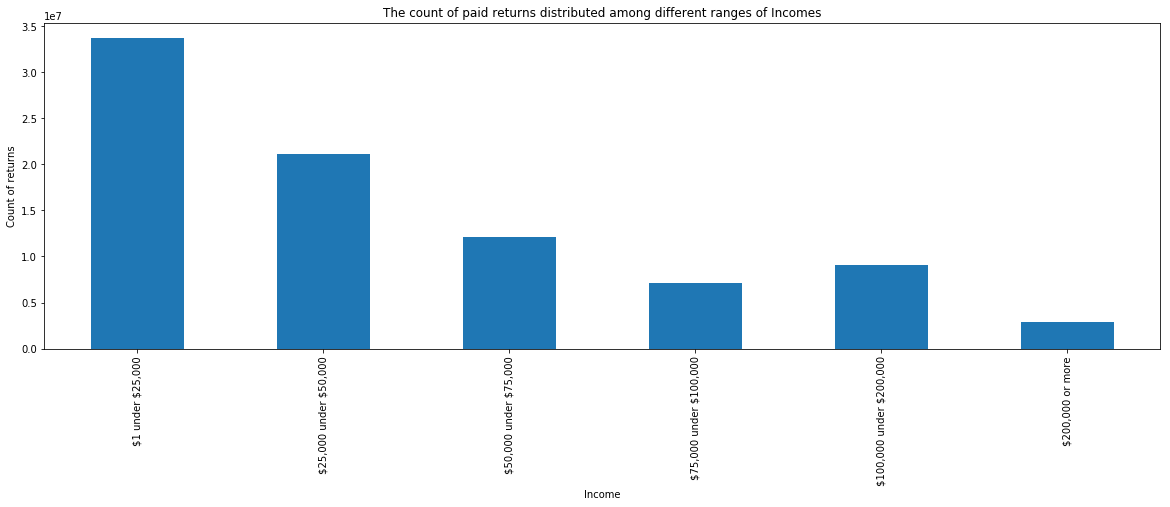

In [189]:
%matplotlib inline
state_stub2 = state_data_irs_clean.pivot_table(index=['agi_stub'], 
                                    columns=['State_x'], 
                                    values='num_paid_preparer_returns',
                                    aggfunc='sum')
stub_category = state_stub.sum()
sc = stub_category.plot(kind="bar",figsize=(20,6),title = 'The count of paid returns distributed among different ranges of Incomes')
sc.set_xlabel("Income")
sc.set_ylabel("Count of returns")

## Analyse the ratio of data
As we can see, people with more income are more willing to pay.

In [178]:
print(state_stub_ratio.columns.values)

['\\$1 under $25,000' '\\$25,000 under $50,000' '\\$50,000 under $75,000'
 '\\$75,000 under $100,000' '\\$100,000 under $200,000'
 '\\$200,000 or more']


['\\$1 under $25,000' '\\$25,000 under $50,000' '\\$50,000 under $75,000'
 '\\$75,000 under $100,000' '\\$100,000 under $200,000'
 '\\$200,000 or more']


Text(0,0.5,'percentage of willing to pay for tax return')

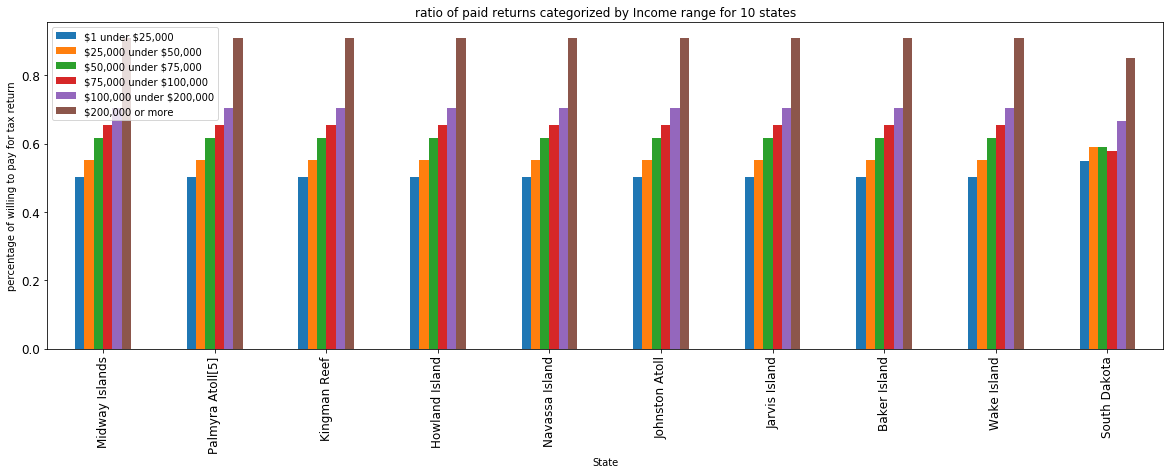

In [201]:
# print(state_data_irs_drop0.columns.)

%matplotlib inline

state_stub_ratio = clean_irs.pivot_table(index=['State_x'], 
                                    columns=['agi_stub'], 
                                    values='paid_ratio') 
# rename the column
new_columns = ['\$1 under $25,000','\$25,000 under $50,000','\$50,000 under $75,000','\$75,000 under $100,000','\$100,000 under $200,000','\$200,000 or more']
state_stub_ratio.columns = new_columns

sub_state_stub_ratio=state_stub_ratio.sort_values(by=['\\$200,000 or more'],ascending=False).head(10) 
sr = sub_state_stub_ratio.plot(kind="bar",figsize=(20,6),fontsize=12,title = 'ratio of paid returns categorized by Income range for 10 states')
sr.set_xlabel("State")
sr.set_ylabel("percentage of willing to pay for tax return")

Text(0,0.5,'percentage')

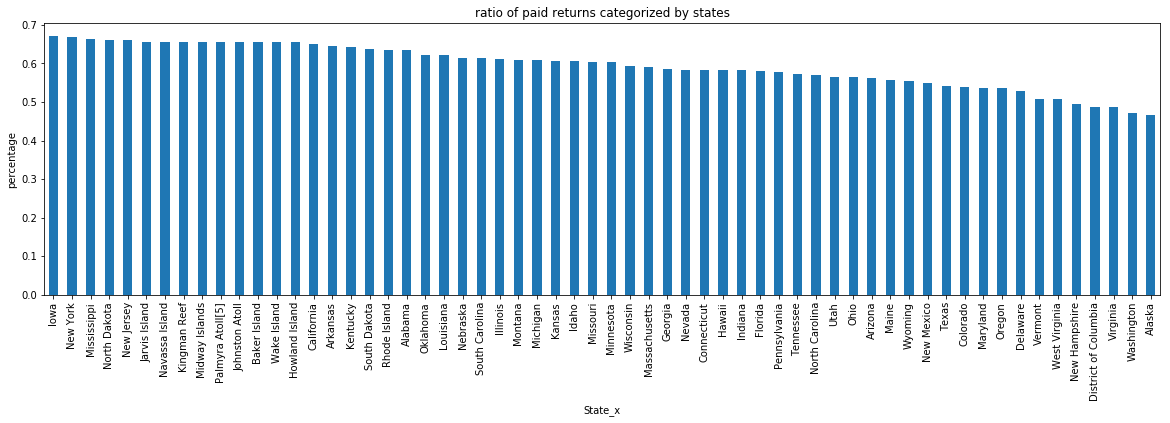

In [203]:
%matplotlib inline
state_stub2_ratio = clean_irs.pivot_table(index=['agi_stub'], 
                                    columns=['State_x'], 
                                    values='paid_ratio', 
                                    )
stub_category_ratio = state_stub2_ratio.mean().sort_values(ascending=False)
scr = stub_category_ratio.plot(kind="bar",figsize=(20,5),title = 'ratio of paid returns categorized by states')
scr.set_ylabel('percentage')

Text(0.5,0,'Income range')

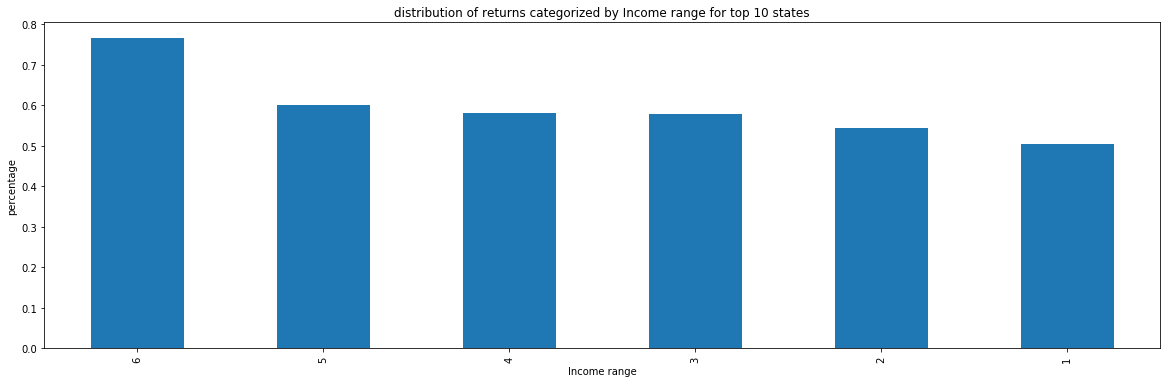

In [210]:
%matplotlib inline
state_stub2_ratio = clean_irs.pivot_table(index=['State_x'], 
                                    columns=['agi_stub'], 
                                    values='paid_ratio', #aggfunc='sum'
                                    )
new_columns = ['\$1 under $25,000','\$25,000 under $50,000','\$50,000 under $75,000','\$75,000 under $100,000','\$100,000 under $200,000','\$200,000 or more']
state_stub_ratio.columns = new_columns
stub_category_ratio = state_stub2_ratio.mean().sort_values(ascending=False)
us_scr = stub_category_ratio.plot(kind="bar",figsize=(20,6),title = 'distribution of returns categorized by Income range for top 10 states')
us_scr.set_ylabel('percentage')
us_scr.set_xlabel('Income range')

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_irs, test_irs = train_test_split(clean_irs, test_size=0.2)
train_irs.to_csv('train_irs.csv')
test_irs.to_csv('test_irs.csv')


## irs: group data into states

In [97]:
# print(clean_irs.loc[:,'paid_ratio' ])

In [207]:

# num_return = state_data_acs.groupby("STATE").mean()['Total; Estimate; Total population']
# clean_irs
state_irs=clean_irs.groupby('State Number').agg({'paid_ratio':'mean', 
                                
                                          
                                          
                                          'agi_stub':'mean' ,
                                          'num_returns' :'sum' ,
                                          'num_single_returns' :'sum' ,
                                          'num_joint_returns'  :'sum' ,            
                                          'num_head_of_household_returns':'sum' ,
                                          'num_paid_preparer_returns':'sum' ,
                                          'num_exemptions':'sum' ,
                                          'num_dependents' :'sum' ,
                                          'amount_agi' :'sum' ,
                                          'num_returns_with_refunds':'sum' ,
                                          'amount_refunds':'sum' 
                                          })


## acs dataset : create dataset and clean

In [36]:
digit=pd.read_csv("digit_abbr.csv")
acs=pd.read_csv("acs_population_demographics.csv")
zc=pd.read_csv("zcta_county_rel_10.csv")

acs_zc=pd.merge(acs,zc, how='left',left_on="ZIP",right_on="ZCTA5")

state_data_acs=pd.merge(digit,acs_zc, how='right',left_on="State Number", right_on="STATE")


## Cut off useless data column and delete row with 0

In [208]:
state_data_acs_clean = state_data_acs[['State Number', 'State Abbreviation','State','ZIP',
 'Total; Estimate; Total population',
 'Male; Estimate; Total population',
 'Female; Estimate; Total population',
 'Total; Estimate; AGE - Under 5 years',
 'Male; Estimate; AGE - Under 5 years',
 'Female; Estimate; AGE - Under 5 years',
 'Total; Estimate; AGE - 5 to 9 years', 'Male; Estimate; AGE - 5 to 9 years',
 'Female; Estimate; AGE - 5 to 9 years',
 'Total; Estimate; AGE - 10 to 14 years',
 'Male; Estimate; AGE - 10 to 14 years',
 'Female; Estimate; AGE - 10 to 14 years',
 'Total; Estimate; AGE - 15 to 19 years',
 'Male; Estimate; AGE - 15 to 19 years',
 'Female; Estimate; AGE - 15 to 19 years',
 'Total; Estimate; AGE - 20 to 24 years',
 'Male; Estimate; AGE - 20 to 24 years',
 'Female; Estimate; AGE - 20 to 24 years',
 'Total; Estimate; AGE - 25 to 29 years',
 'Male; Estimate; AGE - 25 to 29 years',
 'Female; Estimate; AGE - 25 to 29 years',
 'Total; Estimate; AGE - 30 to 34 years',
 'Male; Estimate; AGE - 30 to 34 years',
 'Female; Estimate; AGE - 30 to 34 years',
 'Total; Estimate; AGE - 35 to 39 years',
 'Male; Estimate; AGE - 35 to 39 years',
 'Female; Estimate; AGE - 35 to 39 years',
 'Total; Estimate; AGE - 40 to 44 years',
 'Male; Estimate; AGE - 40 to 44 years',
 'Female; Estimate; AGE - 40 to 44 years',
 'Total; Estimate; AGE - 45 to 49 years',
 'Male; Estimate; AGE - 45 to 49 years',
 'Female; Estimate; AGE - 45 to 49 years',
 'Total; Estimate; AGE - 50 to 54 years',
 'Male; Estimate; AGE - 50 to 54 years',
 'Female; Estimate; AGE - 50 to 54 years',
 'Total; Estimate; AGE - 55 to 59 years',
 'Male; Estimate; AGE - 55 to 59 years',
 'Female; Estimate; AGE - 55 to 59 years',
 'Total; Estimate; AGE - 60 to 64 years',
 'Male; Estimate; AGE - 60 to 64 years',
 'Female; Estimate; AGE - 60 to 64 years',
 'Total; Estimate; AGE - 65 to 69 years',
 'Male; Estimate; AGE - 65 to 69 years',
 'Female; Estimate; AGE - 65 to 69 years',
 'Total; Estimate; AGE - 70 to 74 years',
 'Male; Estimate; AGE - 70 to 74 years',
 'Female; Estimate; AGE - 70 to 74 years',
 'Total; Estimate; AGE - 75 to 79 years',
 'Male; Estimate; AGE - 75 to 79 years',
 'Female; Estimate; AGE - 75 to 79 years',
 'Total; Estimate; AGE - 80 to 84 years',
 'Male; Estimate; AGE - 80 to 84 years',
 'Female; Estimate; AGE - 80 to 84 years',
 'Total; Estimate; AGE - 85 years and over',
 'Male; Estimate; AGE - 85 years and over',
 'Female; Estimate; AGE - 85 years and over',
 'Total; Estimate; SUMMARY INDICATORS - Median age (years)',
 'Male; Estimate; SUMMARY INDICATORS - Median age (years)',
 'Female; Estimate; SUMMARY INDICATORS - Median age (years)',
 'Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females)',
 'Total; Estimate; SUMMARY INDICATORS - Age dependency ratio',
 'Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio',
 'Total; Estimate; SUMMARY INDICATORS - Child dependency ratio']]
# delete rows with 0
state_data_acs_drop0 = state_data_acs_clean[(state_data_acs_clean.T!= 0).all()] 
state_data_acs_drop0.to_csv('clean_acs.csv')
clean_acs=pd.read_csv("clean_acs.csv")


## Try plot Population Pyramid by using acs data
It can help me to explore the dataset and get a grat idea about the distribution

### I wish I could have time to finish this part!

## Create concat dataset , prepare for build up regression model
Be carefull that  you misjoined the table without state the column that should equal! 
eg. join on "zipcode"="ZIP"

In [209]:
zip_irs_acs=pd.merge(clean_irs,clean_acs,left_on="zipcode", right_on="ZIP",how='outer')

zia_drop0 = zip_irs_acs[(zip_irs_acs.T!= 0).all()] 
zia_drop0_dropna= zia_drop0.dropna(axis=0, how='any')


## Split data into train and test dataset

In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_zia, test_zia = train_test_split(zia_drop0_dropna, test_size=0.2)
train_zia.to_csv('train_zia.csv')
test_zia.to_csv('test_zia.csv')